# CASE STUDY : la Vigotte

## Imports and extraction of climatic data

In [1]:
from extractor import *

In [2]:
# la_vigotte = pd.DataFrame.from_dict({'lon': [6.592], 'lat': [47.966]})
# la_vigotte.to_csv("la_vigotte.csv", index=False)

# la_vigotte_current = Extractor("la_vigotte.csv", "la_vigotte_climate_current.csv", scenario='current')
# la_vigotte_current.extract()
# la_vigotte_ssp245 = Extractor("la_vigotte.csv", "la_vigotte_climate_ssp245.csv", scenario='ssp245')
# la_vigotte_ssp245.extract()
# la_vigotte_ssp585 = Extractor("la_vigotte.csv", "la_vigotte_climate_ssp585.csv", scenario='ssp585')
# la_vigotte_ssp585.extract()

# stations = Extractor("stations.csv", "stations_climate_current.csv", id_stations_name="id", scenario='current')
# stations.extract()
# stations_ssp245 = Extractor("stations.csv", "stations_climate_ssp245.csv", id_stations_name="id", scenario='ssp245')
# stations_ssp245.extract()
# stations_ssp585 = Extractor("stations.csv", "stations_climate_ssp585.csv", id_stations_name="id", scenario='ssp585')
# stations_ssp585.extract()

# test_current = Extractor("test.csv", "test_climate_current.csv", id_species_name="plt_id_cfvvf", id_stations_name="id")
# test_current.extract()
# test_ssp245 = Extractor("test.csv", "test_climate_ssp245.csv", id_species_name="plt_id_cfvvf", id_stations_name="id", scenario='ssp245')
# test_ssp245.extract()
# test_ssp585 = Extractor("test.csv", "test_climate_ssp585.csv", id_species_name="plt_id_cfvvf", id_stations_name="id", scenario='ssp585')
# test_ssp585.extract()

# five_species = Extractor("five_species.csv", "five_species_climate.csv", id_species_name="id_pasa", id_stations_name="id_clim")
# five_species.extract()

# grid = Extractor('../Grid/final.csv', '../Grid/grid_climate.csv', id_stations_name="id_clim")
# grid.extract()


In [3]:
from stations import *
from species import *
from empirical_model import *
from linear_regression import *
from occupancy_detection import *
from maxent import *
from visualization import *

## Creation of the species objects

In [4]:
id_list = [2707, 2708, 2709, 2710, 2711, 2714, 2715, 2718, 2719, 2720,
            2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2731, 2732,
            2735, 2736, 2737, 2738, 2739, 2840, 2844, 2845, 2847, 2848,
            2850, 2852, 2854, 2855, 2856, 2857, 2860, 2861, 3611, 3613,
            3615, 3616, 3618, 3620, 3621, 3626, 3628, 3629, 3631, 3632,
            3633, 3634, 3636, 3638, 9027, 9030, 9031, 9032, 9033, 9034,
            9035, 9036, 9037, 9038, 9039, 9040, 9042, 9043, 9044, 9045,
            9046, 9047]



id_list_seen = [2711, 2737, 2840, 2850, 3611, 9027, 9031, 9032, 9045]

In [5]:
species_current = []
species_ssp245 = []
species_ssp585 = []
n_presence = 2000

for id_ in id_list[: ]:
    s = Species("test_climate_current.csv", id_name="plt_id_cfvvf", id_=id_, id_stations_name="id", scenario='current')
    if s.n_presence > n_presence:
        species_current.append(s)
        print(s)
    
for id_ in id_list[: ]:
    s = Species("test_climate_ssp245.csv", id_name="plt_id_cfvvf", id_=id_, id_stations_name="id", scenario='ssp245')
    if s.n_presence > n_presence:
        species_ssp245.append(s)
        print(s)
    
for id_ in id_list[: ]:
    s = Species("test_climate_ssp585.csv", id_name="plt_id_cfvvf", id_=id_, id_stations_name="id", scenario='ssp585')
    if s.n_presence > n_presence:
        species_ssp585.append(s)
        print(s)

| Name: CALLUNA VULGARIS (L.
| ID (plt_id_cfvvf): 2711
| Number of samples: 11379
| Source of species locations: test_climate_current.csv
| Scenario: current
| Name: ERICA ARBOREA L.    
| ID (plt_id_cfvvf): 2715
| Number of samples: 2268
| Source of species locations: test_climate_current.csv
| Scenario: current
| Name: ERICA CINEREA L.    
| ID (plt_id_cfvvf): 2720
| Number of samples: 3045
| Source of species locations: test_climate_current.csv
| Scenario: current
| Name: VACCINIUM MYRTILLUS 
| ID (plt_id_cfvvf): 2737
| Number of samples: 9118
| Source of species locations: test_climate_current.csv
| Scenario: current
| Name: FAGUS SILVATICA L.  
| ID (plt_id_cfvvf): 2840
| Number of samples: 16131
| Source of species locations: test_climate_current.csv
| Scenario: current
| Name: QUERCUS ILEX L.     
| ID (plt_id_cfvvf): 2847
| Number of samples: 6216
| Source of species locations: test_climate_current.csv
| Scenario: current
| Name: QUERCUS LANUGINOSA L
| ID (plt_id_cfvvf): 2848
|

C:\miniconda\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


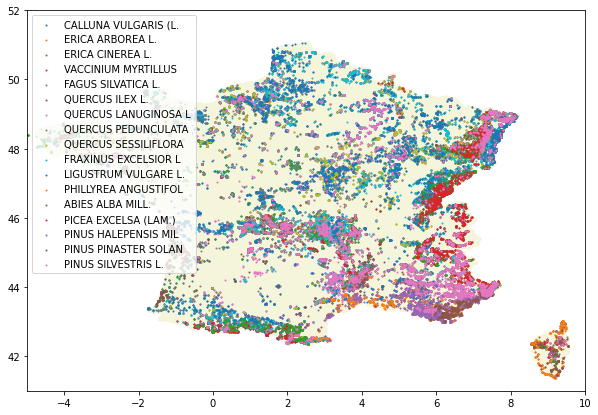

In [6]:
Visualization.plot_area(species_current)

## Test for la Vigotte

In [8]:
names=[]

la_vigotte = pd.read_csv("Data/la_vigotte_climate_current.csv", sep=",")
x_test = la_vigotte[current_variables.values()].values
background = pd.read_csv("Data/stations_climate_current.csv", sep=",")
x_background = background[current_variables.values()].values

lr_preds_current = []
em_preds_current = []

for s in species_current:
    presence = s.presence
    ids_stations = s.ids_stations.values
    x_presence = presence.values
    y_presence = len(x_presence) * [1]
    
    absence = background[~background['id'].isin(ids_stations)]
    x_absence = absence[current_variables.values()].values
    y_absence = len(x_absence) * [0]
    
    x_train = np.concatenate((x_presence, x_absence))
    y_train = np.concatenate((y_presence, y_absence))
    
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)
    lr_preds_current.append(lr_model.predict(x_test))
    print(s)
    
    #maxent_model = Maxent(x_presence, x_background)
    #maxent_model.fit()
    #maxent_preds.append(maxent_model.predict(x_test))
    
    em_model = EmpiricalModel()
    em_model.fit(presence)
    em_prediction = em_model.predict(x_test)
    em_preds_current.append(em_prediction)
    
    names.append(s.latin_name)

| Name: CALLUNA VULGARIS (L.
| ID (plt_id_cfvvf): 2711
| Number of samples: 11379
| Source of species locations: test_climate_current.csv
| Scenario: current
| Name: ERICA ARBOREA L.    
| ID (plt_id_cfvvf): 2715
| Number of samples: 2268
| Source of species locations: test_climate_current.csv
| Scenario: current
| Name: ERICA CINEREA L.    
| ID (plt_id_cfvvf): 2720
| Number of samples: 3045
| Source of species locations: test_climate_current.csv
| Scenario: current
| Name: VACCINIUM MYRTILLUS 
| ID (plt_id_cfvvf): 2737
| Number of samples: 9118
| Source of species locations: test_climate_current.csv
| Scenario: current
| Name: FAGUS SILVATICA L.  
| ID (plt_id_cfvvf): 2840
| Number of samples: 16131
| Source of species locations: test_climate_current.csv
| Scenario: current
| Name: QUERCUS ILEX L.     
| ID (plt_id_cfvvf): 2847
| Number of samples: 6216
| Source of species locations: test_climate_current.csv
| Scenario: current
| Name: QUERCUS LANUGINOSA L
| ID (plt_id_cfvvf): 2848
|

In [9]:
la_vigotte = pd.read_csv("Data/la_vigotte_climate_ssp245.csv", sep=",")
x_test = la_vigotte[ssp245_variables.values()].values
background = pd.read_csv("Data/stations_climate_ssp245.csv", sep=",")
x_background = background[ssp245_variables.values()].values


lr_preds_ssp245 = []
em_preds_ssp245 = []

for s in species_ssp245:
    presence = s.presence
    ids_stations = s.ids_stations.values
    x_presence = presence.values
    y_presence = len(x_presence) * [1]
    
    absence = background[~background['id'].isin(ids_stations)]
    x_absence = absence[ssp245_variables.values()].values
    y_absence = len(x_absence) * [0]
    
    x_train = np.concatenate((x_presence, x_absence))
    y_train = np.concatenate((y_presence, y_absence))
    
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)
    lr_preds_ssp245.append(lr_model.predict(x_test))
    print(s)
    
    #maxent_model = Maxent(x_presence, x_background)
    #maxent_model.fit()
    #maxent_preds.append(maxent_model.predict(x_test))
    
    em_model = EmpiricalModel()
    em_model.fit(presence)
    em_prediction = em_model.predict(x_test)
    em_preds_ssp245.append(em_prediction)

| Name: CALLUNA VULGARIS (L.
| ID (plt_id_cfvvf): 2711
| Number of samples: 11344
| Source of species locations: test_climate_ssp245.csv
| Scenario: ssp245
| Name: ERICA ARBOREA L.    
| ID (plt_id_cfvvf): 2715
| Number of samples: 2221
| Source of species locations: test_climate_ssp245.csv
| Scenario: ssp245
| Name: ERICA CINEREA L.    
| ID (plt_id_cfvvf): 2720
| Number of samples: 2993
| Source of species locations: test_climate_ssp245.csv
| Scenario: ssp245
| Name: VACCINIUM MYRTILLUS 
| ID (plt_id_cfvvf): 2737
| Number of samples: 9119
| Source of species locations: test_climate_ssp245.csv
| Scenario: ssp245
| Name: FAGUS SILVATICA L.  
| ID (plt_id_cfvvf): 2840
| Number of samples: 16129
| Source of species locations: test_climate_ssp245.csv
| Scenario: ssp245
| Name: QUERCUS ILEX L.     
| ID (plt_id_cfvvf): 2847
| Number of samples: 6161
| Source of species locations: test_climate_ssp245.csv
| Scenario: ssp245
| Name: QUERCUS LANUGINOSA L
| ID (plt_id_cfvvf): 2848
| Number of s

In [ ]:
la_vigotte = pd.read_csv("Data/la_vigotte_climate_ssp585.csv", sep=",")
x_test = la_vigotte[ssp585_variables.values()].values
background = pd.read_csv("Data/stations_climate_ssp585.csv", sep=",")
x_background = background[ssp585_variables.values()].values

lr_preds_ssp585 = []
em_preds_ssp585 = []

for s in species_ssp585:
    presence = s.presence
    ids_stations = s.ids_stations.values
    x_presence = presence.values
    y_presence = len(x_presence) * [1]
    
    absence = background[~background['id'].isin(ids_stations)]
    x_absence = absence[ssp585_variables.values()].values
    y_absence = len(x_absence) * [0]
    
    x_train = np.concatenate((x_presence, x_absence))
    y_train = np.concatenate((y_presence, y_absence))
    
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)
    lr_preds_ssp585.append(lr_model.predict(x_test))
    print(s)
    
    #maxent_model = Maxent(x_presence, x_background)
    #maxent_model.fit()
    #maxent_preds.append(maxent_model.predict(x_test))
    
    em_model = EmpiricalModel()
    em_model.fit(presence)
    em_prediction = em_model.predict(x_test)
    em_preds_ssp585.append(em_prediction)

| Name: CALLUNA VULGARIS (L.
| ID (plt_id_cfvvf): 2711
| Number of samples: 11344
| Source of species locations: test_climate_ssp585.csv
| Scenario: ssp585
| Name: ERICA ARBOREA L.    
| ID (plt_id_cfvvf): 2715
| Number of samples: 2221
| Source of species locations: test_climate_ssp585.csv
| Scenario: ssp585
| Name: ERICA CINEREA L.    
| ID (plt_id_cfvvf): 2720
| Number of samples: 2993
| Source of species locations: test_climate_ssp585.csv
| Scenario: ssp585
| Name: VACCINIUM MYRTILLUS 
| ID (plt_id_cfvvf): 2737
| Number of samples: 9119
| Source of species locations: test_climate_ssp585.csv
| Scenario: ssp585
| Name: FAGUS SILVATICA L.  
| ID (plt_id_cfvvf): 2840
| Number of samples: 16129
| Source of species locations: test_climate_ssp585.csv
| Scenario: ssp585
| Name: QUERCUS ILEX L.     
| ID (plt_id_cfvvf): 2847
| Number of samples: 6161
| Source of species locations: test_climate_ssp585.csv
| Scenario: ssp585
| Name: QUERCUS LANUGINOSA L
| ID (plt_id_cfvvf): 2848
| Number of s

In [ ]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(len(species_current))
p = np.random.permutation(len(species_current))

plt.rcParams['figure.figsize'] = (15, 7)
for i in range(len(names)):
    if species_current[i].id_ in id_list_seen:
        c='green'
        marker="o"
    else:
        c='red'
        marker="x"
    plt.plot([lr_preds_current[i], lr_preds_ssp245[i]], [em_preds_current[i], em_preds_ssp245[i]], color=cmap(p[i]))
    plt.plot([lr_preds_current[i], lr_preds_ssp585[i]], [em_preds_current[i], em_preds_ssp585[i]], color=cmap(p[i]))
    plt.scatter(lr_preds_current[i], em_preds_current[i], label=names[i], s=100, marker=marker, color=cmap(p[i]))
    plt.scatter(lr_preds_ssp245[i], em_preds_ssp245[i], s=100, marker="v", color=cmap(p[i]))
    plt.scatter(lr_preds_ssp585[i], em_preds_ssp585[i], s=100, marker="^", color=cmap(p[i]))
    
plt.xlabel("Logistic Regression Prediction")
plt.ylabel("Empirical Model Prediction")
plt.legend()
plt.show()

In [ ]:
"""
x = [1, 3, 13, 16, 25, 28]
y = [37 + 28/60, 38.5, 36 + 52/60, 37 + 25/60, 36 + 22/60, 35 + 50/60]
plt.scatter(x, y)
plt.ylim((35, 40))
plt.show()
"""

## Maps

In [ ]:
spruce_current = Species("test_climate_current.csv", id_name="plt_id_cfvvf",
                         id_=9032, id_stations_name="id", scenario='current')
green_oak_current = Species("test_climate_current.csv", id_name="plt_id_cfvvf",
                         id_=2847, id_stations_name="id", scenario='current')
print(spruce)
print(fir)
print(green_oak)
print(arbutus)

In [ ]:
spruce.train_models()
fir.train_models()
green_oak.train_models()
arbutus.train_models()

In [ ]:
%matplotlib inline
Visualization.plot_prediction_maps(spruce, arbutus)